In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

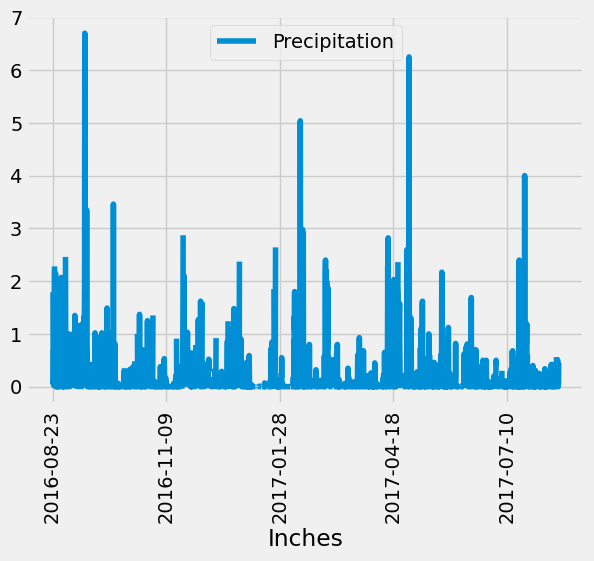

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Convert to datetime object
most_recent_date = pd.to_datetime(most_recent_date[0])

# See the date 12 months ago
twelve_months = most_recent_date - dt.timedelta(days=365)

# Convert to correct format
twelve_months = twelve_months.strftime("%Y-%m-%d")

# Perform a query to retrieve the date and precipitation scores
twelve_months_precipitation = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= twelve_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(twelve_months_precipitation, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
figure1 = precipitation_df.plot(x='Date', y ='Precipitation', rot = 90)

plt.xlabel('Date')
plt.xlabel('Inches')
plt.show()

In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_metrics = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
active_station_metrics

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    80.0
1    79.0
2    81.0
3    79.0
4    78.0
..    ...
352  77.0
353  77.0
354  76.0
355  76.0
356  79.0

[357 rows x 1 columns]


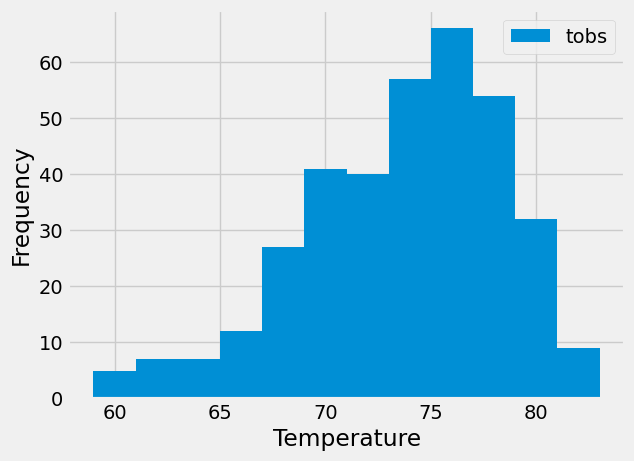

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_recent_date_active = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

# Convert to datetime object
most_recent_date_active = pd.to_datetime(most_recent_date_active[0])

# See the date 12 months ago
twelve_months_date_active_station = most_recent_date_active - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
twelve_months_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= twelve_months_date_active_station.strftime("%Y-%m-%d")).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temperature_df = pd.DataFrame(twelve_months_temp, columns=['tobs'])

# # Sort the dataframe by date
# temperature_df = temperature_df.sort_values(by='Date')
print(temperature_df)
# Plot

temperature_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [15]:
# Close Session
session.close()